In [32]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [33]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

### Область работы 2 (поиск  модели .... )

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3


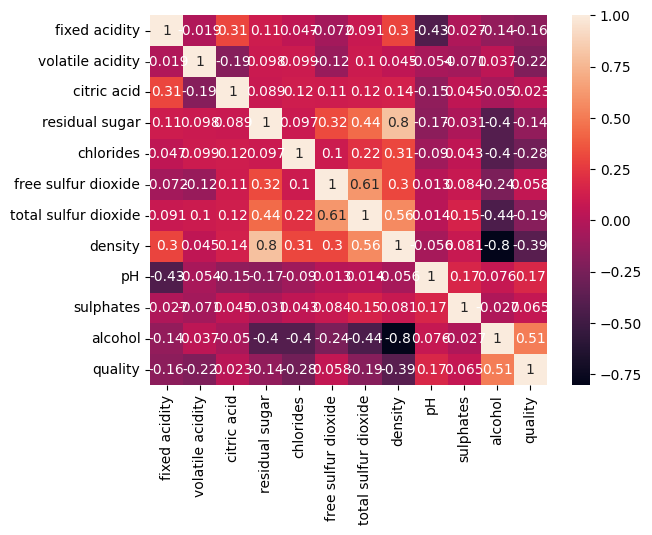

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
df = pd.read_csv(path_train)
sns.heatmap(df.corr(), annot = True)

display(df.head())

<Axes: >

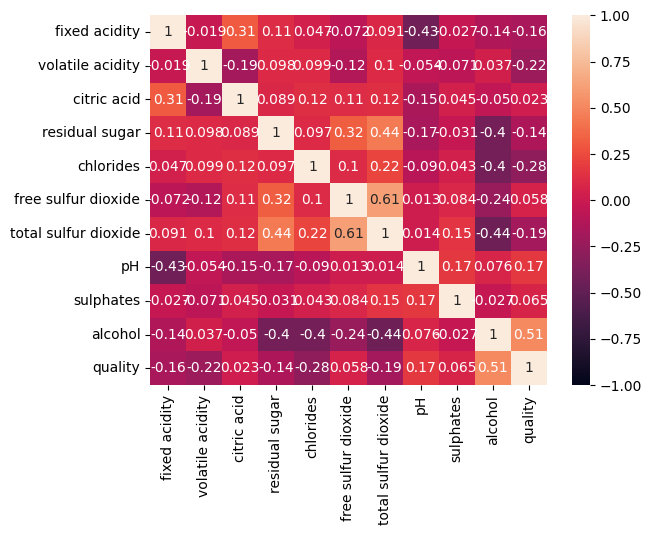

In [3]:
df.drop(columns=['density'], inplace = True) #это столбец высоко коррелирует с другими столбцами, поэтому выкинем его
sns.heatmap(df.corr(), annot = True, vmin=-1)

In [5]:
df.quality = np.where(df.quality>= 7, 1, 0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)


CPU times: total: 0 ns
Wall time: 0 ns


In [7]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier',    KNeighborsClassifier())])

kfold = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 15)
p = np.arange(1,11)
weights = ['uniform','distance']
n_neighbors = np.arange(1, 201, 9)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer() ]

param_grid =[
    {'preprocessing': scaling, 
     'classifier': [KNeighborsClassifier()],
         'classifier__n_neighbors': n_neighbors,
         'classifier__p': p,
         'classifier__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring = 'precision_weighted')
grid.fit(X_train,y_train)
grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=15, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=136,
                                                              weights='distance')],
                          'classifier__n_neighbors': array([  1,  10,  19,  28,  37,  46,  55,  64,  73,  82,  91, 100, 109,
       118, 127, 136, 145, 154, 163, 172, 181, 190, 199]),
                          'classifier__p': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             scoring='precision_weighted')

In [8]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score'])
grid_result.T

,1213,1053,646,566,661,1293,244,252,332,1373,...,1819,1787,1827,1723,1795,1835,1803,1811,1731,1715
mean_fit_time,0.001541,0.002308,0.005012,0.003698,0.002279,0.001603,0.003214,0.001846,0.001791,0.00161,...,0.00187,0.001602,0.001502,0.002241,0.001505,0.00164,0.001484,0.001334,0.00197,0.001663
std_fit_time,0.000468,0.000485,0.001487,0.001085,0.00095,0.00061,0.002212,0.000448,0.000363,0.000494,...,0.000342,0.000492,0.000549,0.000668,0.000484,0.000546,0.00052,0.000473,0.000788,0.000475
mean_score_time,0.014854,0.016551,0.013622,0.010708,0.080544,0.015582,0.011737,0.008257,0.00885,0.016426,...,0.063183,0.062816,0.062066,0.078888,0.062301,0.064537,0.062433,0.061851,0.063205,0.062574
std_score_time,0.000565,0.001318,0.001835,0.001196,0.005365,0.00044,0.00197,0.000696,0.00066,0.000546,...,0.002121,0.002034,0.001872,0.019383,0.002099,0.001582,0.001885,0.002084,0.001931,0.002171
param_classifier,"KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...",...,"KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=...","KNeighborsClassifier(n_neighbors=136, weights=..."
param_classifier__n_neighbors,136,118,73,64,73,145,28,28,37,154,...,199,199,199,190,199,199,199,199,190,190
param_classifier__p,2,2,1,1,3,2,1,2,2,2,...,8,4,9,6,5,10,6,7,7,5
param_classifier__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [9]:
grid.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=136, weights='distance'),
 'classifier__n_neighbors': 136,
 'classifier__p': 2,
 'classifier__weights': 'distance',
 'preprocessing': StandardScaler()}

precision mean  0.6967382477774476
recall mean  0.6138655913978491
f1 mean  0.6517825255633322
rc mean  0.7316150246145878


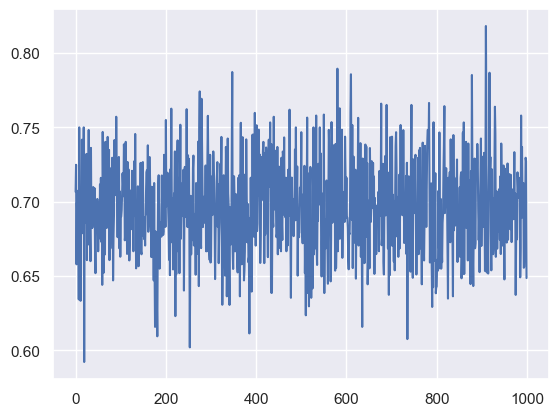

In [12]:
pres = []
recall = []
f1 = []
rc = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)

    pipe = Pipeline([('preprocessing', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=172, p=3, weights='distance'))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pres.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    rc.append(roc_auc_score(y_test, y_pred))

print('precision mean ', sum(pres)/len(pres))
print('recall mean ', sum(recall)/len(recall))
print('f1 mean ', sum(f1)/len(f1))
print('rc mean ', sum(rc)/len(rc))
plt.plot(pres)
#precision


# print(classification_report(y_test, y_pred))
# print('precision: ', precision_score(y_test, y_pred))
# print('recall: ', recall_score(y_test, y_pred))
# print('f1: ', f1_score(y_test, y_pred))
# print('roc auc score: ', roc_auc_score(y_test, y_pred))

precision mean  0.6830019077665413
recall mean  0.6348387096774184
f1 mean  0.6572104583915451
rc mean  0.7344901379712382


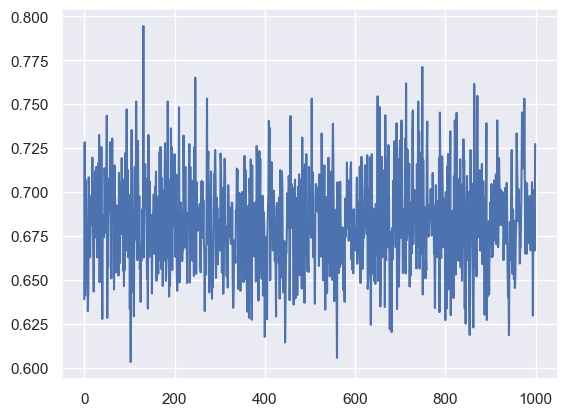

In [13]:
pres = []
recall = []
f1 = []
rc = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)
    pipe = Pipeline([('preprocessing', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=118, p=2, weights='distance'))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pres.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    rc.append(roc_auc_score(y_test, y_pred))
print('precision mean ', sum(pres)/len(pres))
print('recall mean ', sum(recall)/len(recall))
print('f1 mean ', sum(f1)/len(f1))
print('rc mean ', sum(rc)/len(rc))
plt.plot(pres)
#precision_weighted

# print(classification_report(y_test, y_pred))
# print('precision: ', precision_score(y_test, y_pred))
# print('recall: ', recall_score(y_test, y_pred))
# print('f1: ', f1_score(y_test, y_pred))
# print('roc auc score: ', roc_auc_score(y_test, y_pred))

In [15]:
confusion_matrix(y_test, y_pred)

array([[275,  57],
       [ 74, 112]], dtype=int64)

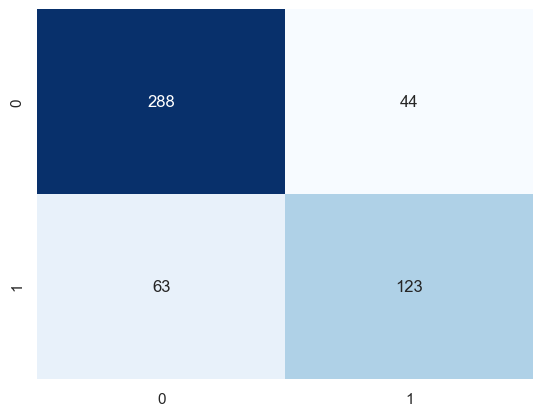

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt='g', cbar=None,cmap="Blues");

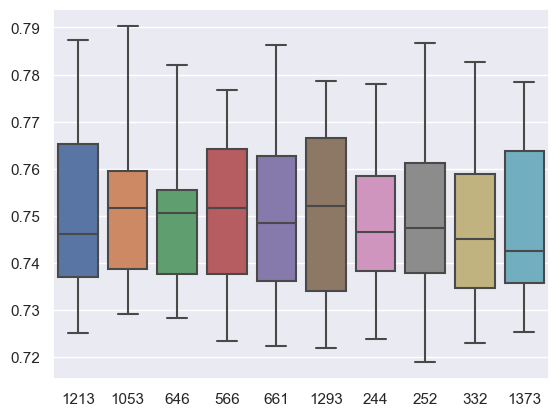

In [11]:
mask = grid_result.T.index[grid_result.T.index.str.endswith("_test_score")][:-3]
tabl = grid_result.T.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

In [21]:
print('OHHHH BLYAAAAAT My final message')
print('Best params: ', grid.best_params_)
print('Precision score: ', precision_score(y_test, y_pred))

OHHHH BLYAAAAAT My final message
Best params:  {'classifier': KNeighborsClassifier(n_neighbors=177, p=3, weights='distance'), 'classifier__n_neighbors': 177, 'classifier__p': 3, 'classifier__weights': 'distance', 'preprocessing': StandardScaler()}
Precision score:  0.7365269461077845


In [24]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

space = np.logspace(-5, 8, 15)
cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 15)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid = [
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
         'clf__class_weight': ['balanced', None],
         'clf__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear', 'saga'],
     'clf__class_weight': ['balanced', None],
         'clf__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
   },
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'sag', 'saga', 'newton-cholesky'],
     'clf__class_weight': ['balanced', None],
         'clf__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
    }
     ]
grid = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'precision')
grid.fit(X_train, y_train)
grid    

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'roc_auc_ovo', 'f1_macro', 'neg_mean_squared_error', 'jaccard_samples', 'matthews_corrcoef', 'rand_score', 'roc_auc', 'recall_macro', 'jaccard_macro', 'completeness_score', 'precision_weighted', 'jaccard_micro', 'precision_micro', 'precision_samples', 'adjusted_rand_score', 'f1_samples', 'neg_mean_poisson_deviance', 'neg_negative_likelihood_ratio', 'neg_mean_absolute_error', 'homogeneity_score', 'neg_brier_score', 'r2', 'v_measure_score', 'precision', 'neg_mean_gamma_deviance', 'adjusted_mutual_info_score', 'roc_auc_ovo_weighted', 'neg_mean_squared_log_error', 'recall', 'recall_weighted', 'jaccard_weighted', 'roc_auc_ovr_weighted', 'neg_log_loss', 'recall_samples', 'jaccard', 'f1', 'max_error', 'accuracy', 'positive_likelihood_ratio', 'explained_variance', 'roc_auc_ovr', 'top_k_accuracy', 'fowlkes_mallows_score', 'mutual_info_score', 'average_precision', 'f1_weighted', 'neg_mean_absolute_percentage_error', 'balanced_accuracy', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision_macro', 'neg_root_mean_squared_error', 'f1_micro', 'recall_micro'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'prec' instead.

In [8]:
grid_log_results = pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score', 'std_test_score']).T
grid_log_results

,24,28,36,40,44,32,72,76,84,88,...,227,231,235,239,915,923,927,939,943,955
mean_fit_time,0.00471,0.003067,0.002948,0.003061,0.002647,0.001961,0.00473,0.003539,0.002694,0.002833,...,0.001476,0.00368,0.003884,0.002076,0.001644,0.001831,0.002819,0.001747,0.00379,0.002439
std_fit_time,0.000615,0.000367,0.000371,0.000477,0.000573,0.000546,0.000842,0.000504,0.000449,0.000622,...,0.000465,0.000924,0.000662,0.000267,0.000604,0.000483,0.000513,0.000494,0.000658,0.000613
mean_score_time,0.001845,0.001954,0.001634,0.002049,0.001773,0.002068,0.002005,0.001896,0.001811,0.001602,...,0.002034,0.002196,0.002472,0.001899,0.001903,0.001963,0.001904,0.002042,0.001955,0.002106
std_score_time,0.000575,0.000552,0.000459,0.000583,0.000593,0.000445,0.000228,0.000374,0.0005,0.000489,...,0.000384,0.000512,0.000664,0.000269,0.000379,0.000459,0.000454,0.000656,0.000485,0.000419
param_clf__C,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,...,0.5,0.5,0.5,0.5,0.1,0.1,0.1,0.2,0.2,0.3
param_clf__class_weight,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,balanced,None,None,None,None,None
param_clf__penalty,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,...,l2,l2,l2,l2,l1,l1,l1,l1,l1,l1
param_clf__solver,newton-cg,lbfgs,sag,saga,newton-cholesky,liblinear,newton-cg,lbfgs,sag,saga,...,liblinear,sag,saga,newton-cholesky,liblinear,liblinear,saga,liblinear,saga,liblinear
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...","{'clf__C': 0.1, 'clf__class_weight': None, 'cl...","{'clf__C': 0.1, 'clf__class_weight': None, 'cl...","{'clf__C': 0.1, 'clf__class_weight': None, 'cl...","{'clf__C': 0.1, 'clf__class_weight': None, 'cl...","{'clf__C': 0.1, 'clf__class_weight': None, 'cl...","{'clf__C': 0.2, 'clf__class_weight': None, 'cl...","{'clf__C': 0.2, 'clf__class_weight': None, 'cl...","{'clf__C': 0.2, 'clf__class_weight': None, 'cl...","{'clf__C': 0.2, 'clf__class_weight': None, 'cl...",...,"{'clf__C': 0.5, 'clf__class_weight': None, 'cl...","{'clf__C': 0.5, 'clf__class_weight': None, 'cl...","{'clf__C': 0.5, 'clf__class_weight': None, 'cl...","{'clf__C': 0.5, 'clf__class_weight': None, 'cl...","{'clf__C': 0.1, 'clf__class_weight': 'balanced...","{'clf__C': 0.1, 'clf__class_weight': None, 'cl...","{'clf__C': 0.1, 'clf__class_weight': None, 'cl...","{'clf__C': 0.2, 'clf__class_weight': None, 'cl...","{'clf__C': 0.2, 'clf__class_weight': None, 'cl...","{'clf__C': 0.3, 'clf__class_weight': None, 'cl..."


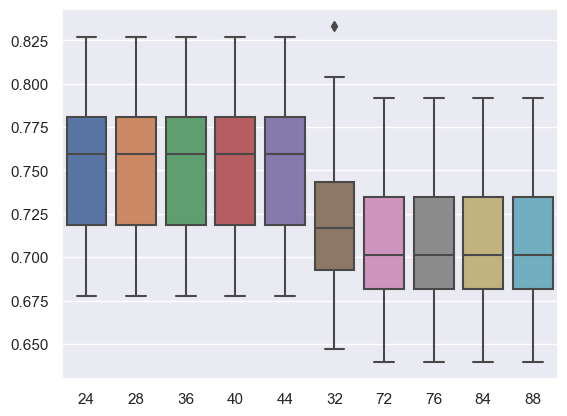

In [9]:
mask = grid_log_results.index[grid_log_results.index.str.endswith("_test_score")][:-3]
tabl = grid_log_results.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

In [10]:
grid.best_params_

{'clf__C': 0.1,
 'clf__class_weight': None,
 'clf__penalty': 'l2',
 'clf__solver': 'newton-cg',
 'preprocessing': MinMaxScaler()}

precision mean  0.6884456793288086
recall mean  0.5792688172043012
f1 mean  0.6285088367330866
rc mean  0.7158979628190179


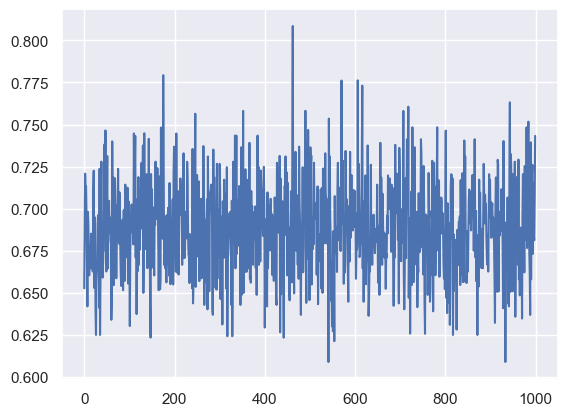

In [14]:
pres = []
recall = []
f1 = []
rc = []
for i in range(1000):

    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)
    #roc_auc
    pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('clf',           LogisticRegression(penalty='l2', solver='newton-cholesky', C=0.1))])


    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pres.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    rc.append(roc_auc_score(y_test, y_pred))
print('precision mean ', sum(pres)/len(pres))
print('recall mean ', sum(recall)/len(recall))
print('f1 mean ', sum(f1)/len(f1))
print('rc mean ', sum(rc)/len(rc))
plt.plot(pres)
# print(classification_report(y_test, y_pred))
# print('precision: ', precision_score(y_test, y_pred))
# print('recall: ', recall_score(y_test, y_pred))
# print('f1: ', f1_score(y_test, y_pred))
# print('roc auc score: ', roc_auc_score(y_test, y_pred))

precision mean  0.6258907695986138
recall mean  0.7920215053763401
f1 mean  0.6988572441991799
rc mean  0.7631327406399798


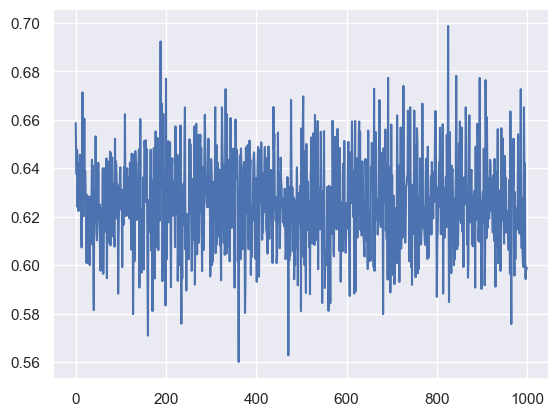

In [20]:
pres = []
recall = []
f1 = []
rc = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)

    #f1
    pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('clf',           LogisticRegression(penalty='l2', solver='newton-cg', C=0.1, class_weight = 'balanced'))])


    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pres.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    rc.append(roc_auc_score(y_test, y_pred))
print('precision mean ', sum(pres)/len(pres))
print('recall mean ', sum(recall)/len(recall))
print('f1 mean ', sum(f1)/len(f1))
print('rc mean ', sum(rc)/len(rc))
plt.plot(pres)
# print(classification_report(y_test, y_pred))
# print('precision: ', precision_score(y_test, y_pred))
# print('recall: ', recall_score(y_test, y_pred))
# print('f1: ', f1_score(y_test, y_pred))
# print('roc auc score: ', roc_auc_score(y_test, y_pred))

precision mean  0.6279773334507016
recall mean  0.7939247311827914
f1 mean  0.7009065796383762
rc mean  0.764939775229953


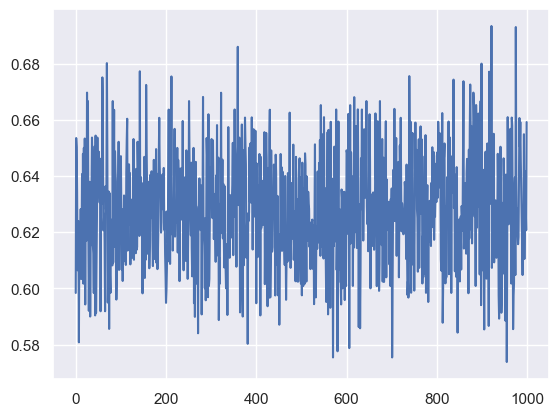

In [21]:
pres = []
recall = []
f1 = []
rc = []
for i in range(1000):

    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)
    #f1_wighted
    pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('clf',           LogisticRegression(penalty='l2', solver='liblinear', C=0.4, class_weight = 'balanced'))])


    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pres.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    rc.append(roc_auc_score(y_test, y_pred))
print('precision mean ', sum(pres)/len(pres))
print('recall mean ', sum(recall)/len(recall))
print('f1 mean ', sum(f1)/len(f1))
print('rc mean ', sum(rc)/len(rc))
plt.plot(pres)
# print(classification_report(y_test, y_pred))
# print('precision: ', precision_score(y_test, y_pred))
# print('recall: ', recall_score(y_test, y_pred))
# print('f1: ', f1_score(y_test, y_pred))
# print('roc auc score: ', roc_auc_score(y_test, y_pred))

precision mean  0.6266373327230215
recall mean  0.796612903225803
f1 mean  0.7011348656389053
rc mean  0.7650805479984439


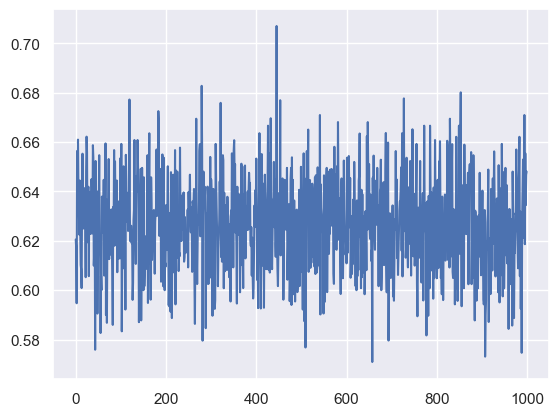

In [22]:
pres = []
recall = []
f1 = []
rc = []
for i in range(1000):


    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)
    #precision_wighted
    pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('clf',           LogisticRegression(penalty='l2', solver='liblinear', C=0.2, class_weight = 'balanced'))])


    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pres.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    rc.append(roc_auc_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print('precision: ', precision_score(y_test, y_pred))
# print('recall: ', recall_score(y_test, y_pred))
# print('f1: ', f1_score(y_test, y_pred))
# print('roc auc score: ', roc_auc_score(y_test, y_pred))
print('precision mean ', sum(pres)/len(pres))
print('recall mean ', sum(recall)/len(recall))
print('f1 mean ', sum(f1)/len(f1))
print('rc mean ', sum(rc)/len(rc))
plt.plot(pres)

precision mean  0.722355755774309
recall mean  0.39663978494623725
f1 mean  0.5111726724273429
rc mean  0.6553138683767326


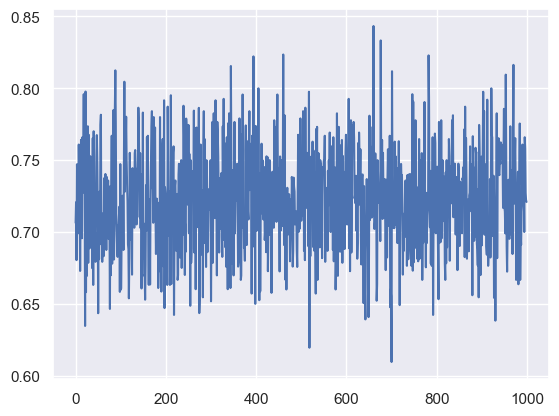

In [23]:
pres = []
recall = []
f1 = []
rc = []
for i in range(1000):

    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)
    #roc_auc
    pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression(penalty='l2', solver='newton-cg', C=0.1))])


    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pres.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    rc.append(roc_auc_score(y_test, y_pred))
print('precision mean ', sum(pres)/len(pres))
print('recall mean ', sum(recall)/len(recall))
print('f1 mean ', sum(f1)/len(f1))
print('rc mean ', sum(rc)/len(rc))
plt.plot(pres)